In [1]:
import os
import sys
from pathlib import Path
from typing import Literal

import IPython
import pandas as pd
from IPython.display import display

notebook_path = Path(IPython.extract_module_locals()[1]["__vsc_ipynb_file__"])
project_dir = notebook_path.parent.parent
sys.path.append(str(project_dir))
import src.utils.custom_log as custom_log
from src.visualization.validity_chain.ValChainStyledPlot import ValChainStyledPlot
from src.utils.Csv import Csv

os.chdir(project_dir)
log = custom_log.init_logger(log_lvl=10, start_msg=f"Start in {Path().cwd()}")

2024-01-31 10:31:47,696 MainProcess  - MainThread      INFO  START || custom_log.py
2024-01-31 10:31:47,700 MainProcess  - MainThread      INFO  START || custom_log.py
2024-01-31 10:31:47,707 MainProcess  - MainThread      INFO  Start in c:\Users\plaschkies\Documents\Py_Projects\aihiii || custom_log.py


# Get Data

In [2]:
# read report data
csv = Csv(csv_path=Path(r"Q:\Val_Chain_Sims\From_Reports") / "extracted.csv.zip", log=log, compress=True)
db_report: pd.DataFrame = csv.read()
report_ass = ["HW TH Report", "CAE TH Report"]
db_report.replace({"CAE NHTSA": report_ass[1], "Test NHTSA": report_ass[0]}, inplace=True)

display(db_report)

2024-01-31 10:31:48,077 MainProcess  - MainThread      DEBUG CSV file without suffix is Q:\Val_Chain_Sims\From_Reports\extracted, Compress True || Csv.py
2024-01-31 10:31:48,082 MainProcess  - MainThread      DEBUG CSV file is Q:\Val_Chain_Sims\From_Reports\extracted.csv.zip || Csv.py
2024-01-31 10:31:48,085 MainProcess  - MainThread      DEBUG Read Q:\Val_Chain_Sims\From_Reports\extracted.csv.zip || Csv.py


Value   Time             Channel         Source           Case
0      -0.0454    1.0  00COG00000VH00ACXD  CAE TH Report   Full Frontal
1       0.2117    2.0  00COG00000VH00ACXD  CAE TH Report   Full Frontal
2       0.4767    3.0  00COG00000VH00ACXD  CAE TH Report   Full Frontal
3       0.6952    4.0  00COG00000VH00ACXD  CAE TH Report   Full Frontal
4       0.6031    5.0  00COG00000VH00ACXD  CAE TH Report   Full Frontal
...        ...    ...                 ...            ...            ...
16953  14.7103  135.0  00COG00000VH00VERD   HW TH Report  Oblique Right
16954  14.7095  136.0  00COG00000VH00VERD   HW TH Report  Oblique Right
16955  14.7089  137.0  00COG00000VH00VERD   HW TH Report  Oblique Right
16956  14.7082  138.0  00COG00000VH00VERD   HW TH Report  Oblique Right
16957  14.7069  139.0  00COG00000VH00VERD   HW TH Report  Oblique Right

[16958 rows x 5 columns]

In [3]:
# read CAE THOR data
csv = Csv(csv_path=Path(r"Q:\Val_Chain_Sims\Honda_Accord_2014_Original_THOR_2_7") / f"extracted.csv.zip", log=log, compress=True)
db_cae_thor: pd.DataFrame = csv.read()
db_cae_thor.replace({"Assemblies_1":"SP 48", "Assemblies_2":"DP 48", "Assemblies_3":"SP 96", "Assemblies_4":"DP 96"}, inplace=True)
display(db_cae_thor)

2024-01-31 10:31:48,596 MainProcess  - MainThread      DEBUG CSV file without suffix is Q:\Val_Chain_Sims\Honda_Accord_2014_Original_THOR_2_7\extracted, Compress True || Csv.py
2024-01-31 10:31:48,600 MainProcess  - MainThread      DEBUG CSV file is Q:\Val_Chain_Sims\Honda_Accord_2014_Original_THOR_2_7\extracted.csv.zip || Csv.py
2024-01-31 10:31:48,604 MainProcess  - MainThread      DEBUG Read Q:\Val_Chain_Sims\Honda_Accord_2014_Original_THOR_2_7\extracted.csv.zip || Csv.py


Time    Value             Channel   Source Assembly  \
0          0.0  15.5587  00COG00000VH00VEXD  CAE THI    SP 48   
1          0.1  15.5586  00COG00000VH00VEXD  CAE THI    SP 48   
2          0.2  15.5584  00COG00000VH00VEXD  CAE THI    SP 48   
3          0.3  15.5583  00COG00000VH00VEXD  CAE THI    SP 48   
4          0.4  15.5582  00COG00000VH00VEXD  CAE THI    SP 48   
...        ...      ...                 ...      ...      ...   
4841851  139.6 -30.6234  03PELVLOC0TH50DSZD  CAE THI    DP 96   
4841852  139.7 -30.6206  03PELVLOC0TH50DSZD  CAE THI    DP 96   
4841853  139.8 -30.6182  03PELVLOC0TH50DSZD  CAE THI    DP 96   
4841854  139.9 -30.6161  03PELVLOC0TH50DSZD  CAE THI    DP 96   
4841855  140.0 -30.6143  03PELVLOC0TH50DSZD  CAE THI    DP 96   

                               Configuration           Case  Side  
0        Honda_Accord_2014_Original_THOR_2_7   Full Frontal   NaN  
1        Honda_Accord_2014_Original_THOR_2_7   Full Frontal   NaN  
2        Honda_Accord_2014_Original_THOR_2_7   Full Frontal   NaN  
3        Honda_Accord_2014_Original_THOR_2_7   Full Frontal   NaN  
4        Honda_Accord_2014_Original_THOR_2_7   Full Frontal   NaN  
...                                      ...            ...   ...  
4841851  Honda_Accord_2014_Original_THOR_2_7  Oblique Right   NaN  
4841852  Honda_Accord_2014_Original_THOR_2_7  Oblique Right   NaN  
4841853  Honda_Accord_2014_Original_THOR_2_7  Oblique Right   NaN  
4841854  Honda_Accord_2014_Original_THOR_2_7  Oblique Right   NaN  
4841855  Honda_Accord_2014_Original_THOR_2_7  Oblique Right   NaN  

[4841856 rows x 8 columns]

In [4]:
# read CAE HIII Speed data
csv = Csv(csv_path=Path(r"Q:\Val_Chain_Sims\Honda_Accord_2014_Sled_with_HIII_RuntimeMin") / f"extracted.csv.zip", log=log, compress=True)
db_cae_speed: pd.DataFrame = csv.read()
db_cae_speed.replace({"Assemblies_1":"SP 48", "Assemblies_2":"DP 48", "Assemblies_3":"SP 96", "Assemblies_4":"DP 96"}, inplace=True)
display(db_cae_speed)

2024-01-31 10:31:59,179 MainProcess  - MainThread      DEBUG CSV file without suffix is Q:\Val_Chain_Sims\Honda_Accord_2014_Sled_with_HIII_RuntimeMin\extracted, Compress True || Csv.py
2024-01-31 10:31:59,183 MainProcess  - MainThread      DEBUG CSV file is Q:\Val_Chain_Sims\Honda_Accord_2014_Sled_with_HIII_RuntimeMin\extracted.csv.zip || Csv.py
2024-01-31 10:31:59,186 MainProcess  - MainThread      DEBUG Read Q:\Val_Chain_Sims\Honda_Accord_2014_Sled_with_HIII_RuntimeMin\extracted.csv.zip || Csv.py


Time    Value             Channel   Source Assembly  \
0          0.0 -15.5577  00COG00000VH00VEXD  CAE THI    SP 48   
1          0.1 -15.5576  00COG00000VH00VEXD  CAE THI    SP 48   
2          0.2 -15.5574  00COG00000VH00VEXD  CAE THI    SP 48   
3          0.3 -15.5572  00COG00000VH00VEXD  CAE THI    SP 48   
4          0.4 -15.5570  00COG00000VH00VEXD  CAE THI    SP 48   
...        ...      ...                 ...      ...      ...   
5951443  139.6 -24.1677  03PELVLOC0H350DSZD  CAE THI    DP 96   
5951444  139.7 -24.1425  03PELVLOC0H350DSZD  CAE THI    DP 96   
5951445  139.8 -24.1203  03PELVLOC0H350DSZD  CAE THI    DP 96   
5951446  139.9 -24.1010  03PELVLOC0H350DSZD  CAE THI    DP 96   
5951447  140.0 -24.0847  03PELVLOC0H350DSZD  CAE THI    DP 96   

                                       Configuration           Case Side  
0        Honda_Accord_2014_Sled_with_HIII_RuntimeMin   Full Frontal   DR  
1        Honda_Accord_2014_Sled_with_HIII_RuntimeMin   Full Frontal   DR  
2        Honda_Accord_2014_Sled_with_HIII_RuntimeMin   Full Frontal   DR  
3        Honda_Accord_2014_Sled_with_HIII_RuntimeMin   Full Frontal   DR  
4        Honda_Accord_2014_Sled_with_HIII_RuntimeMin   Full Frontal   DR  
...                                              ...            ...  ...  
5951443  Honda_Accord_2014_Sled_with_HIII_RuntimeMin  Oblique Right   PA  
5951444  Honda_Accord_2014_Sled_with_HIII_RuntimeMin  Oblique Right   PA  
5951445  Honda_Accord_2014_Sled_with_HIII_RuntimeMin  Oblique Right   PA  
5951446  Honda_Accord_2014_Sled_with_HIII_RuntimeMin  Oblique Right   PA  
5951447  Honda_Accord_2014_Sled_with_HIII_RuntimeMin  Oblique Right   PA  

[5951448 rows x 8 columns]

# Plot

In [5]:
def plot_pulse(case: Literal["Oblique Right", "Oblique Left", "Full Frontal"]):
    boundary_channels = [
        ["00COG00000VH00VEXD", "00COG00000VH00VEYD"],
        ["00COG00000VH00ACXD", "00COG00000VH00ACYD"],
    ]

    plot = ValChainStyledPlot(channels=boundary_channels, hw_ration=0.8, nb_path=notebook_path)

    for ch in plot.channels:
        # add report data (always CFC60)
        report = db_report[db_report["Channel"].eq(ch) & db_report["Case"].eq(case)]
        for i, ass in enumerate(report_ass, 1):
            report2 = report[report["Source"].eq(ass)]
            flip = (
                -1
                if (ch == "00COG00000VH00VEXD" and case != "Full Frontal")
                or (ch == "00COG00000VH00ACXD")
                or (ch == "00COG00000VH00VEYD" and case == "Oblique Left")
                or (ch == "00COG00000VH00ACYD" and case == "Oblique Right")
                else 1
            )

            plot.add_line(channel=ch, x=report2["Time"], y=report2["Value"] * flip, label=ass, c_id=-i)

        # determine cae flip
        flip = (
            -1
            if (ch == "00COG00000VH00VEXD")
            or (ch == "00COG00000VH00ACXD")
            or (ch == "00COG00000VH00VEYD" and case == "Oblique Left")
            or (ch == "00COG00000VH00VEYD" and case == "Oblique Right")
            or (ch == "00COG00000VH00ACYD" and case == "Oblique Right")
            or (ch == "00COG00000VH00ACYD" and case == "Oblique Left")
            else 1
        )

        # filter CAE data
        for i, db_cae in enumerate([db_cae_thor, db_cae_speed]):
            flip2 = 1 if i == 0 else -1
            cae = db_cae[db_cae["Channel"].eq(ch) & db_cae["Case"].eq(case)]
            cae.loc[:, "Value"] *= flip * flip2

            # plot single curves
            for j, setting in enumerate(sorted(cae["Assembly"].unique())):
                cae2 = cae[cae["Assembly"].eq(setting)].sort_values("Time")
                plot.add_line(
                    channel=ch, x=cae2["Time"], y=cae2["Value"], label=f"CAE {plot.dummies[i]} {setting}", c_id=j, ls_id=i
                )

            # min max corridor
            plot.add_range(channel=ch, cae=cae, fill_c_id=i)

    plot.format_store(region="VEH", case=case)

2024-01-23 11:58:15,490 MainProcess  - MainThread      INFO  Store plots in reports\figures\validity_chain\056_Eval_ValChain_THOR_HIII_Speed with file extention(s) ['png', 'pdf'] || ValChainStyledPlot.py
2024-01-23 11:58:15,517 MainProcess  - MainThread      DEBUG Installed font ['TeX Gyre Adventor', 'TeX Gyre Bonum', 'TeX Gyre Chorus', 'TeX Gyre Cursor', 'TeX Gyre Heros', 'TeX Gyre Heros Cn', 'TeX Gyre Pagella', 'TeX Gyre Schola', 'TeX Gyre Termes'] || ValChainStyledPlot.py
2024-01-23 11:58:15,714 MainProcess  - MainThread      DEBUG Add 00COG00000VH00VEXD line HW TH Report || ValChainStyledPlot.py
2024-01-23 11:58:15,729 MainProcess  - MainThread      DEBUG Add 00COG00000VH00VEXD line CAE TH Report || ValChainStyledPlot.py
2024-01-23 11:58:16,365 MainProcess  - MainThread      DEBUG Add 00COG00000VH00VEXD line CAE TH DP 48 || ValChainStyledPlot.py
2024-01-23 11:58:16,374 MainProcess  - MainThread      DEBUG Add 00COG00000VH00VEXD line CAE TH DP 96 || ValChainStyledPlot.py
2024-01-23 

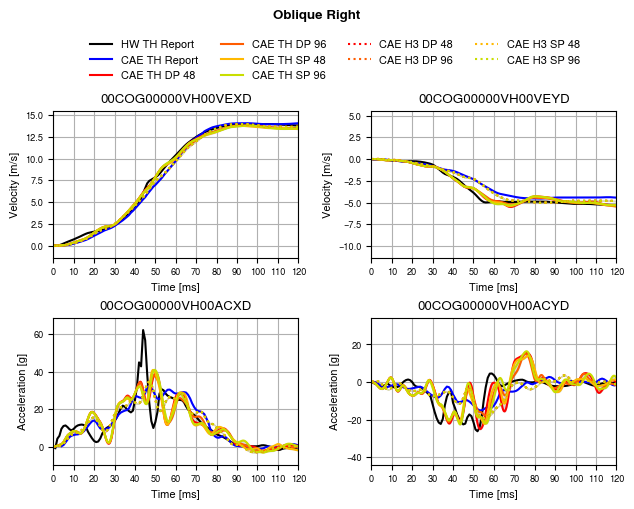

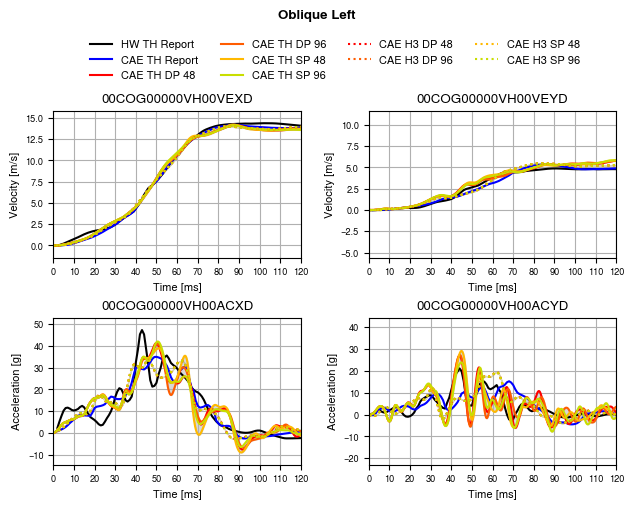

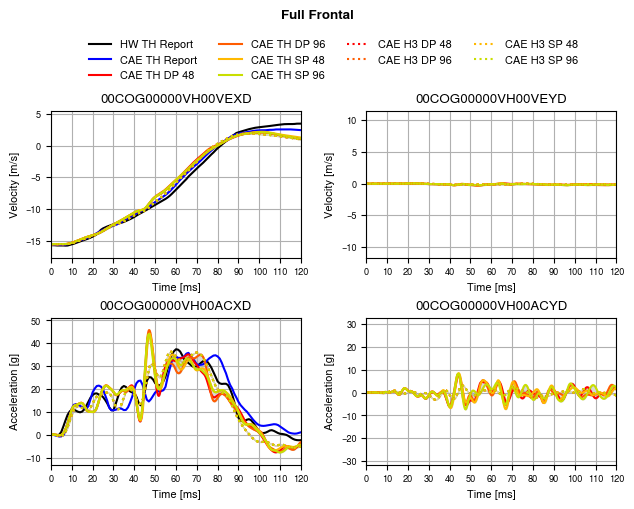

In [6]:
for case in ["Oblique Right", "Oblique Left", "Full Frontal"]:
    plot_pulse(case)

In [7]:
def plt_restraint(side: Literal[1, 3], case: Literal["Oblique Right", "Oblique Left", "Full Frontal"]):
    s = {1: "01", 3: "03"}[side]

    channels = [
        [f"{s}FAB00000VH00PRRD", f"{s}BELTBUSLVH00DSRD"],
        [f"{s}BELTB000VH00DSRD", f"{s}BELTB000VH00FORD"],
        [f"{s}BELTB300VH00FORD", f"{s}BELTB400VH00FORD"],
        [f"{s}BELTB500VH00FORD", f"{s}BELTB600VH00FORD"],
    ]

    plot = ValChainStyledPlot(channels=channels, hw_ration=1.5, nb_path=notebook_path)
    for ch in plot.channels:
        # plot report data
        chh = f"{ch[:10]}TH50{ch[14:-1]}D"
        report = db_report[db_report["Channel"].eq(chh) & db_report["Case"].eq(case)]
        for i, ass in enumerate(report_ass, 1):
            report2 = report[report["Source"].eq(ass)]
            plot.add_line(channel=ch, x=report2["Time"], y=report2["Value"], label=ass, c_id=-i)

        # plot CAE data
        for i, db_cae in enumerate([db_cae_thor, db_cae_speed]):
            cae = db_cae[db_cae["Channel"].eq(ch) & db_cae["Case"].eq(case)]

            if "BELTB0" in ch and "DS" in ch:
                cae["Value"] -= cae["Value"] .min()

            # plot single curves
            for j, setting in enumerate(sorted(cae["Assembly"].unique())):
                cae2 = cae[cae["Assembly"].eq(setting)].sort_values("Time")
                plot.add_line(
                    channel=ch, x=cae2["Time"], y=cae2["Value"], label=f"CAE {plot.dummies[i]} {setting}", c_id=j, ls_id=i
                )

            # min max corridor
            plot.add_range(channel=ch, cae=cae, fill_c_id=i)

    plot.format_store(region="RESTRAINT", case=case, side=side)

2024-01-23 11:58:57,332 MainProcess  - MainThread      INFO  Store plots in reports\figures\validity_chain\056_Eval_ValChain_THOR_HIII_Speed with file extention(s) ['png', 'pdf'] || ValChainStyledPlot.py
2024-01-23 11:58:57,335 MainProcess  - MainThread      DEBUG Installed font ['TeX Gyre Adventor', 'TeX Gyre Bonum', 'TeX Gyre Chorus', 'TeX Gyre Cursor', 'TeX Gyre Heros', 'TeX Gyre Heros Cn', 'TeX Gyre Pagella', 'TeX Gyre Schola', 'TeX Gyre Termes'] || ValChainStyledPlot.py
2024-01-23 11:58:57,564 MainProcess  - MainThread      DEBUG Add 01FAB00000VH00PRRD line HW TH Report || ValChainStyledPlot.py
2024-01-23 11:58:57,569 MainProcess  - MainThread      DEBUG Add 01FAB00000VH00PRRD line CAE TH Report || ValChainStyledPlot.py
2024-01-23 11:58:58,049 MainProcess  - MainThread      DEBUG Add 01FAB00000VH00PRRD line CAE TH DP 48 || ValChainStyledPlot.py
2024-01-23 11:58:58,058 MainProcess  - MainThread      DEBUG Add 01FAB00000VH00PRRD line CAE TH DP 96 || ValChainStyledPlot.py
2024-01-23 

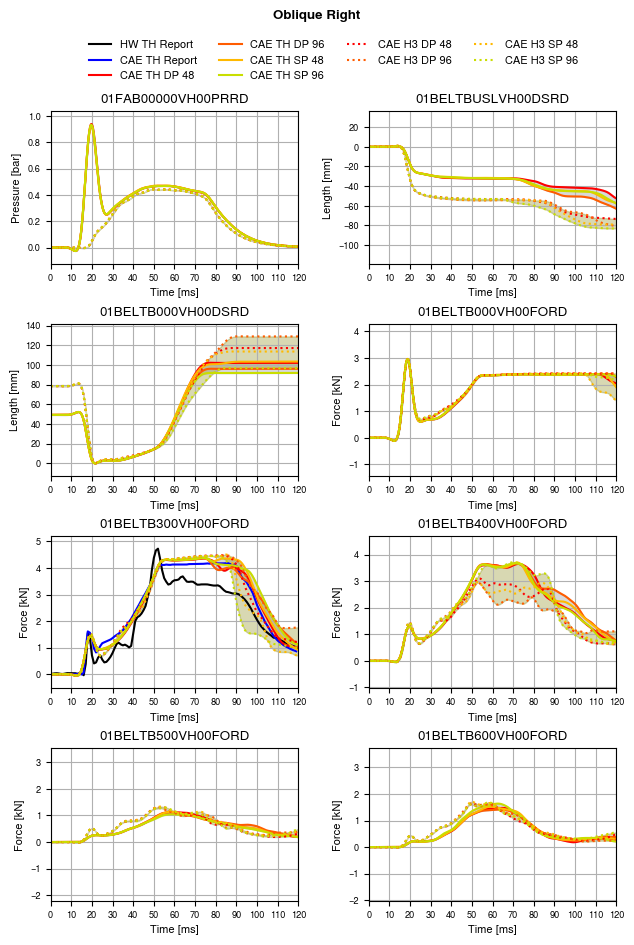

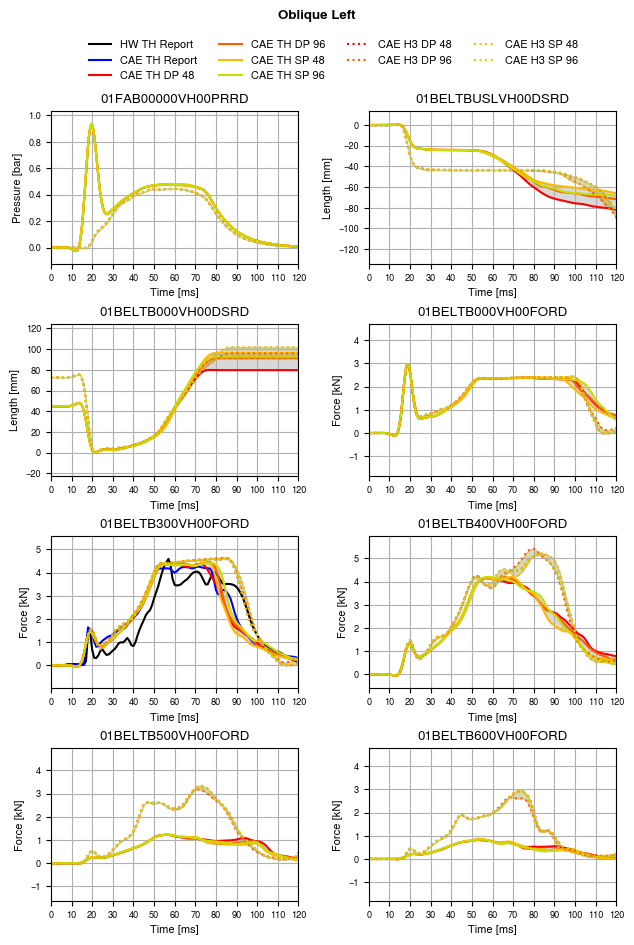

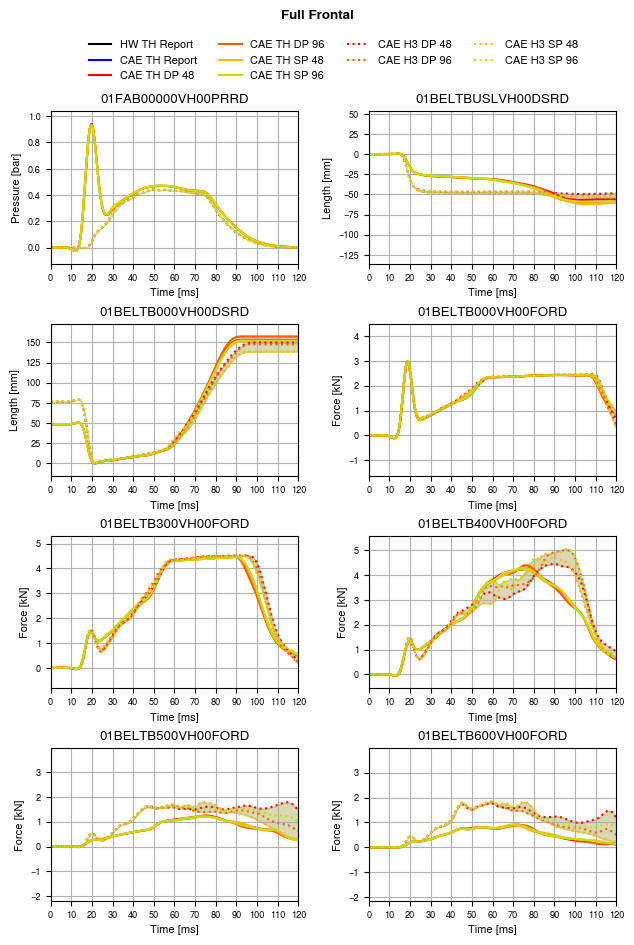

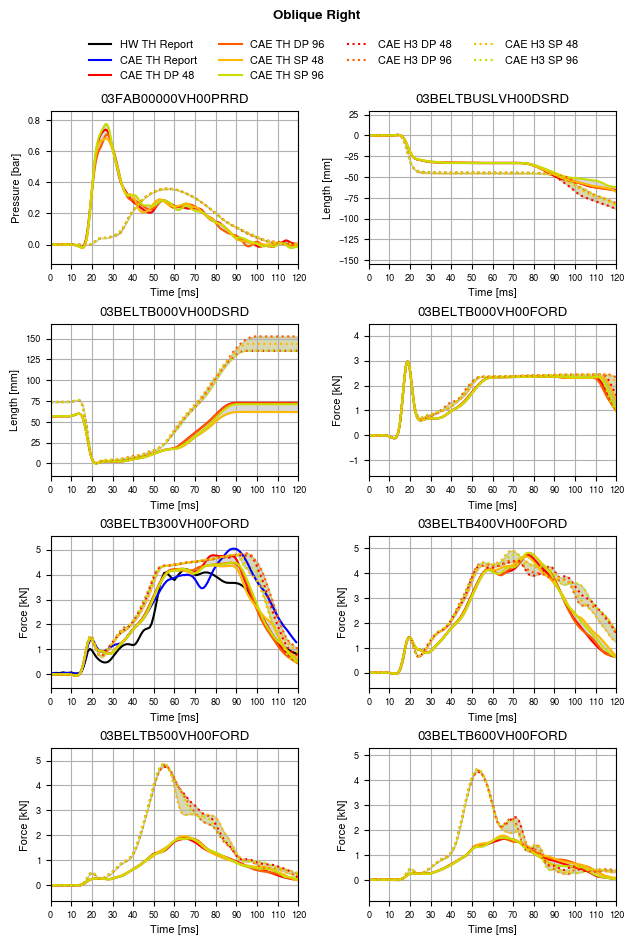

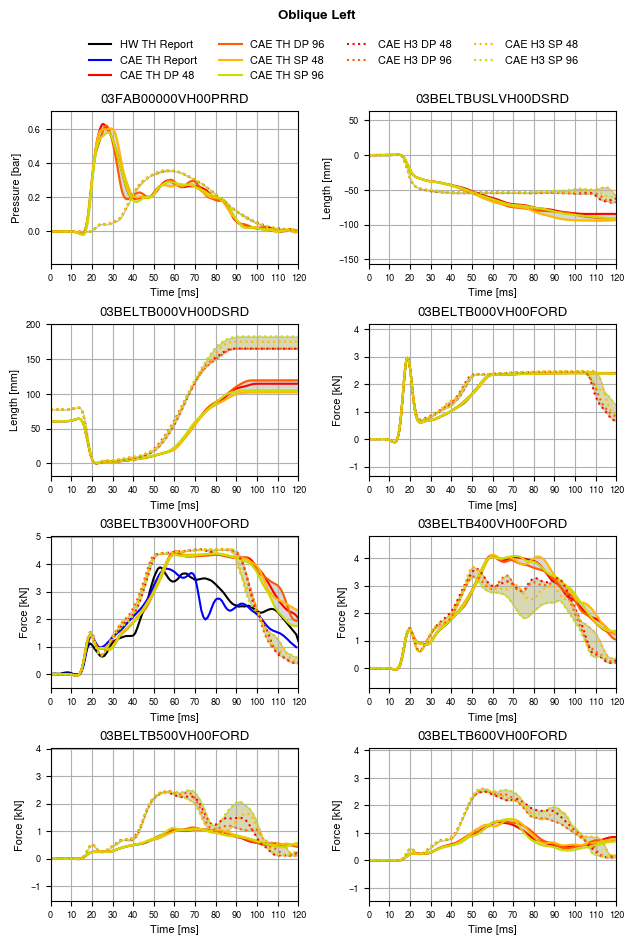

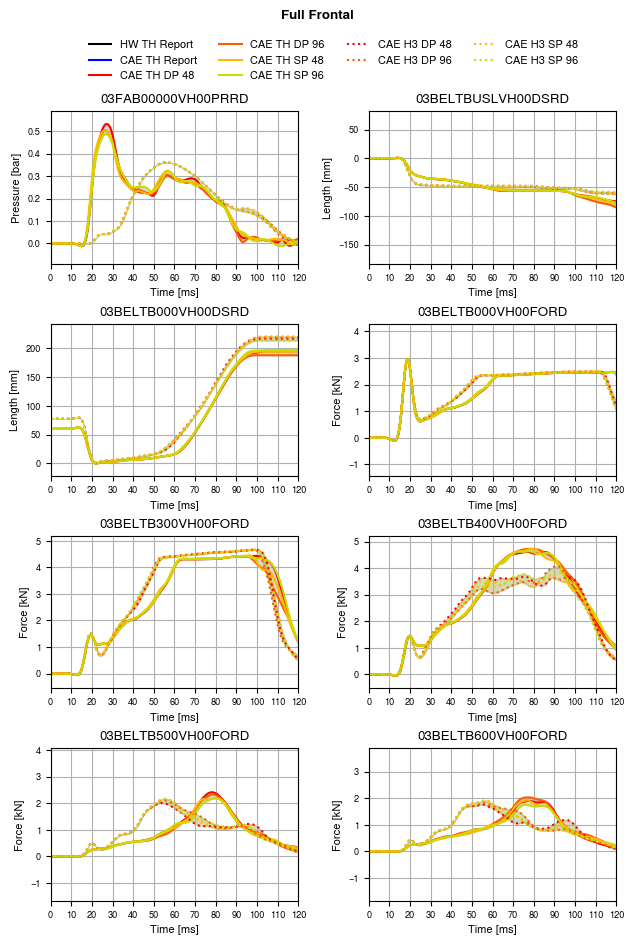

In [8]:
for ss in [1, 3]:
    for case in ["Oblique Right", "Oblique Left", "Full Frontal"]:
        plt_restraint(ss, case)

In [9]:
def plot_body_acc(side: Literal[1, 3], case: Literal["Oblique Right", "Oblique Left", "Full Frontal"], part: Literal["HEAD", "CHST", "PELV"]):
    s = {1: "01", 3: "03"}[side]

    channels = [
        [f"{s}{part}0000??50ACRD", f"{s}{part}0000??50ACXD"],
        [f"{s}{part}0000??50ACYD", f"{s}{part}0000??50ACZD"],
    ]

    plot = ValChainStyledPlot(channels=channels, hw_ration=0.8, nb_path=notebook_path)

    for ch in plot.channels:
        # plot report data
        report = db_report[db_report["Channel"].eq(ch.replace("??", "TH")) & db_report["Case"].eq(case)]
        flip = -1 if "HEAD0000??50ACX" in ch or "HEAD0000??50ACZ" in ch else 1

        for i, ass in enumerate(report_ass, 1):
            report2 = report[report["Source"].eq(ass)]
            plot.add_line(channel=ch, x=report2["Time"], y=report2["Value"] * flip, label=ass, c_id=-i)

        # plot CAE data
        for i, db_cae in enumerate([db_cae_thor, db_cae_speed]):
            cae = db_cae[db_cae["Channel"].eq(ch.replace("??", plot.dummies[i])) & db_cae["Case"].eq(case)]

            # plot single curves
            for j, setting in enumerate(sorted(cae["Assembly"].unique())):
                cae2 = cae[cae["Assembly"].eq(setting)].sort_values("Time")
                plot.add_line(
                    channel=ch, x=cae2["Time"], y=cae2["Value"], label=f"CAE {plot.dummies[i]} {setting}", c_id=j, ls_id=i
                )

            # min max corridor
            plot.add_range(channel=ch, cae=cae, fill_c_id=i)

    plot.format_store(region=f"{part}_acceleration", case=case, side=side)

2024-01-23 12:01:44,165 MainProcess  - MainThread      INFO  Store plots in reports\figures\validity_chain\056_Eval_ValChain_THOR_HIII_Speed with file extention(s) ['png', 'pdf'] || ValChainStyledPlot.py
2024-01-23 12:01:44,169 MainProcess  - MainThread      DEBUG Installed font ['TeX Gyre Adventor', 'TeX Gyre Bonum', 'TeX Gyre Chorus', 'TeX Gyre Cursor', 'TeX Gyre Heros', 'TeX Gyre Heros Cn', 'TeX Gyre Pagella', 'TeX Gyre Schola', 'TeX Gyre Termes'] || ValChainStyledPlot.py
2024-01-23 12:01:44,810 MainProcess  - MainThread      DEBUG Add 01HEAD0000??50ACRD line HW TH Report || ValChainStyledPlot.py
2024-01-23 12:01:44,815 MainProcess  - MainThread      DEBUG Add 01HEAD0000??50ACRD line CAE TH Report || ValChainStyledPlot.py
2024-01-23 12:01:45,433 MainProcess  - MainThread      DEBUG Add 01HEAD0000??50ACRD line CAE TH DP 48 || ValChainStyledPlot.py
2024-01-23 12:01:45,440 MainProcess  - MainThread      DEBUG Add 01HEAD0000??50ACRD line CAE TH DP 96 || ValChainStyledPlot.py
2024-01-23 

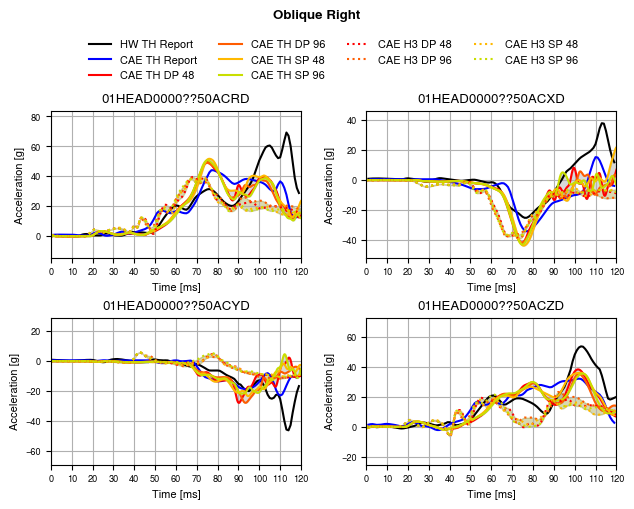

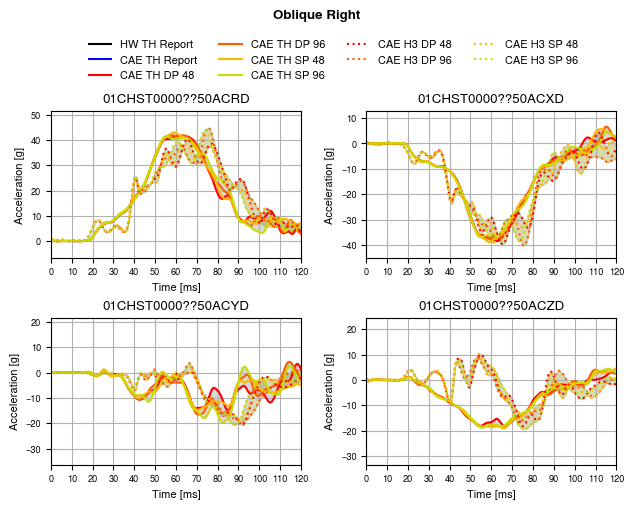

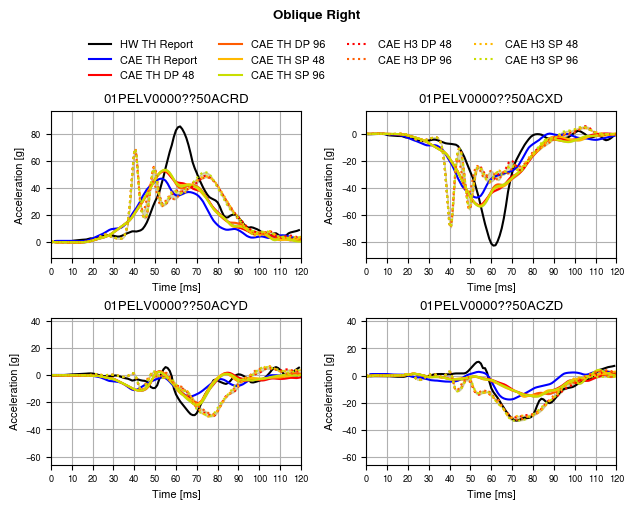

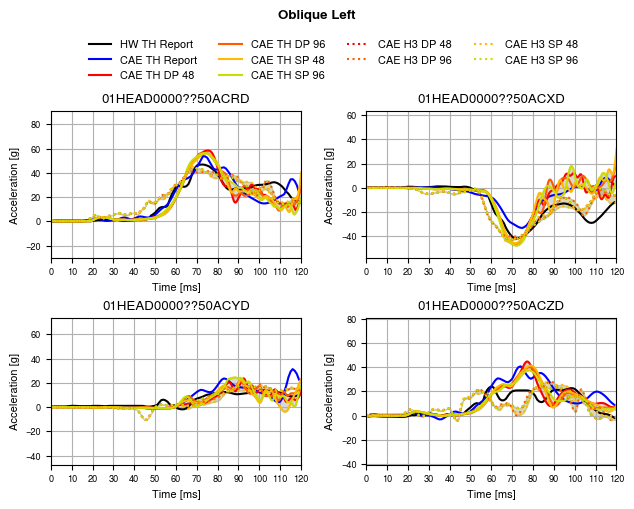

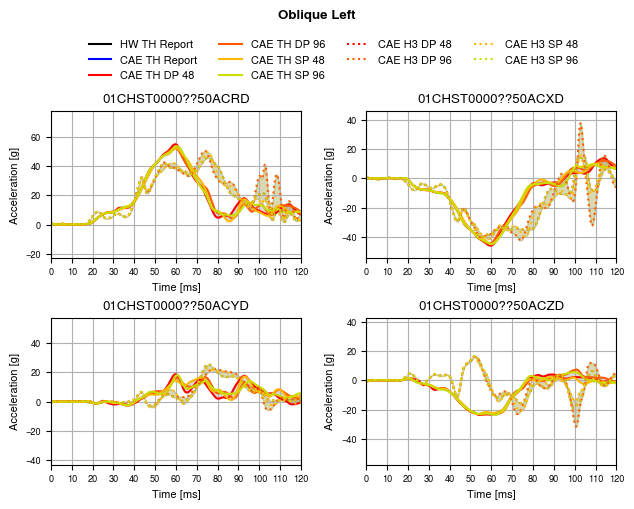

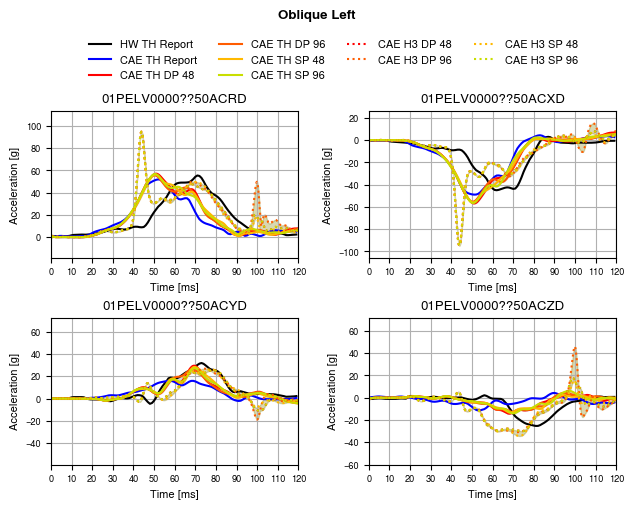

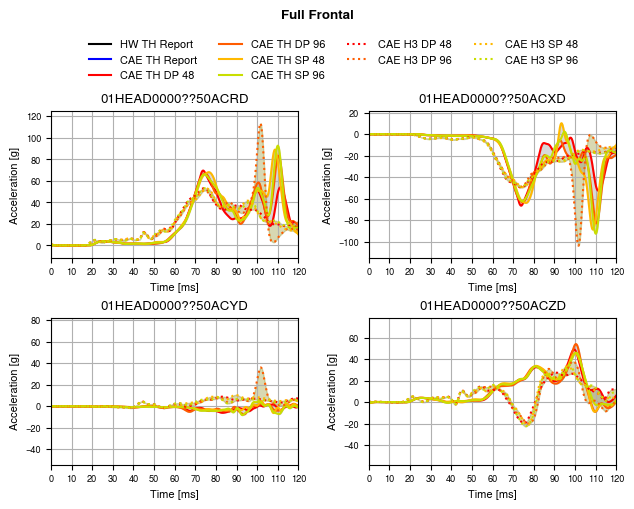

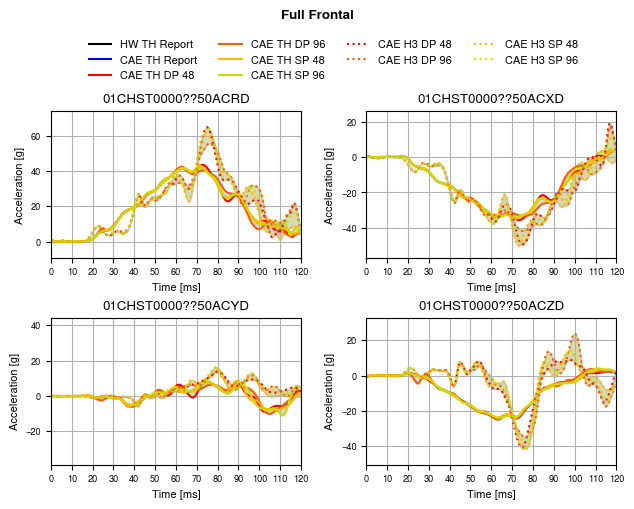

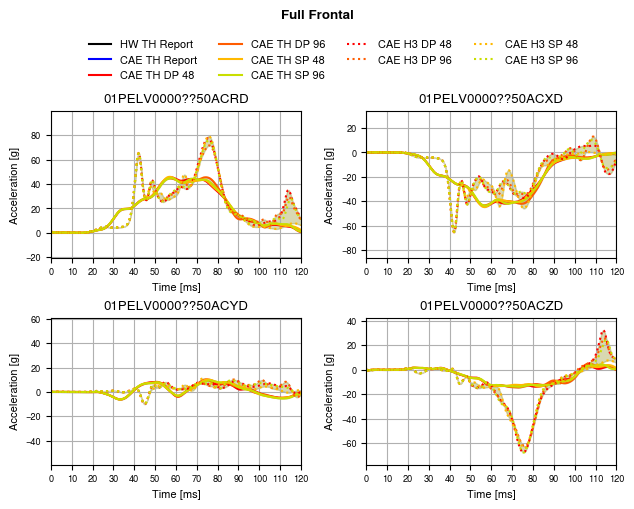

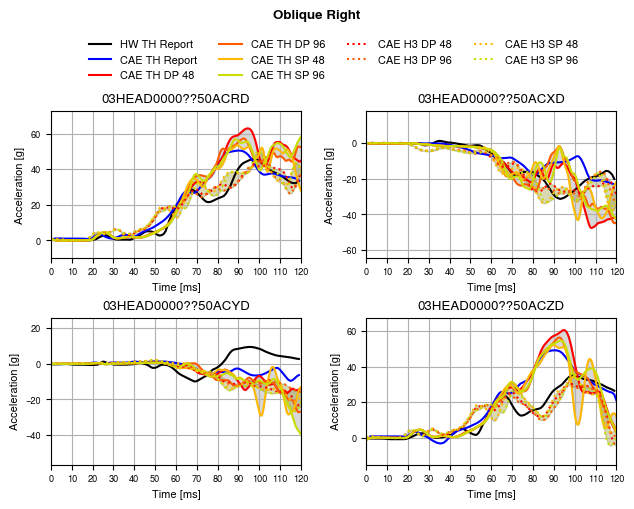

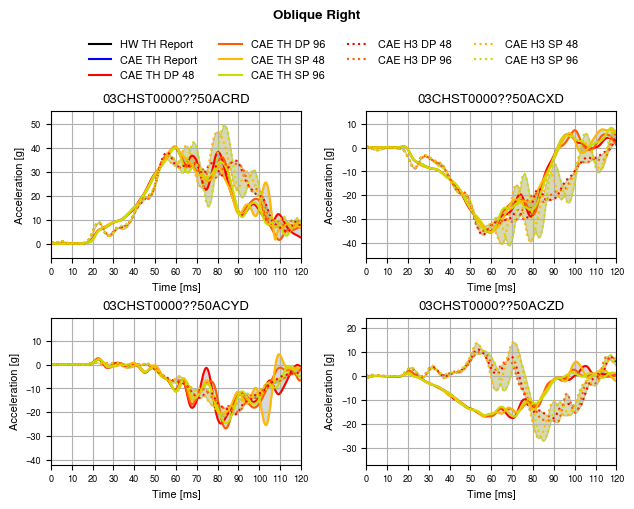

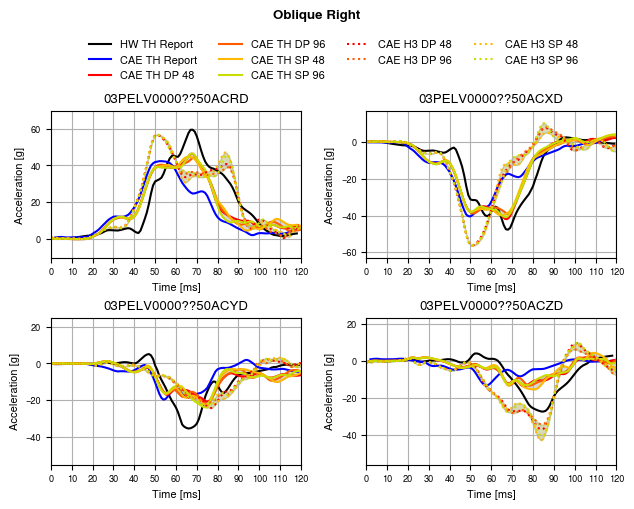

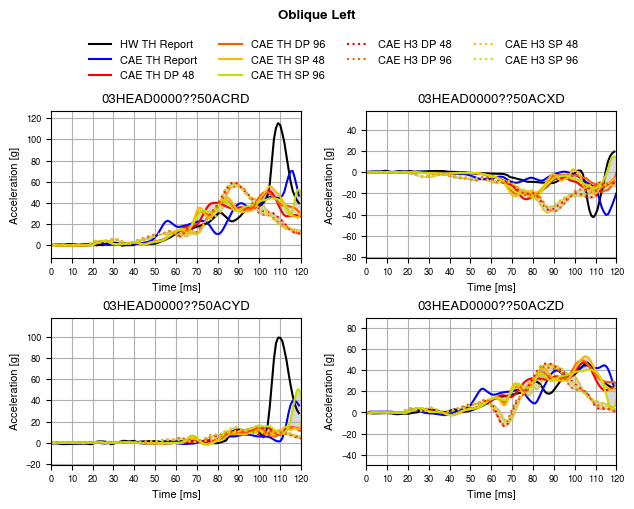

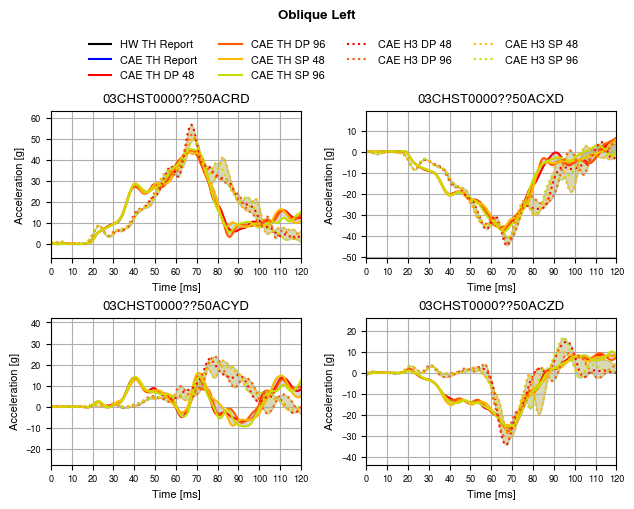

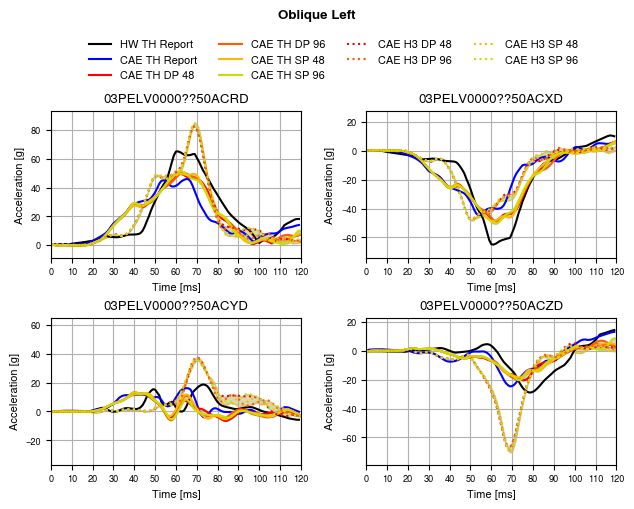

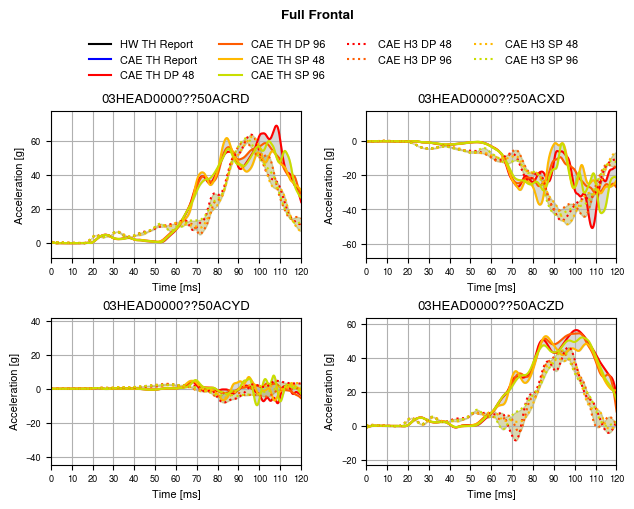

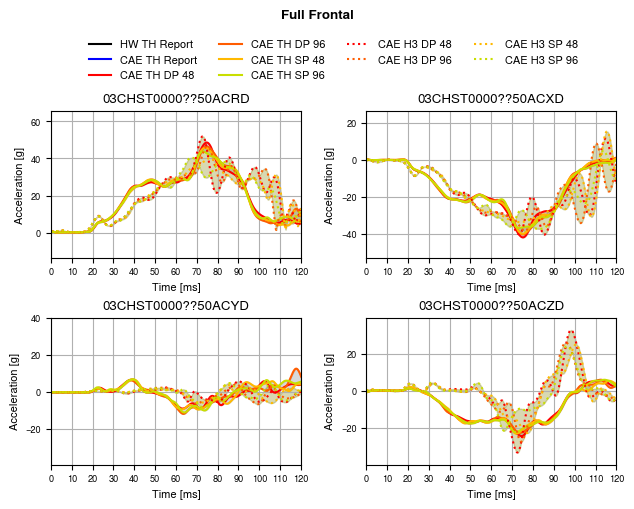

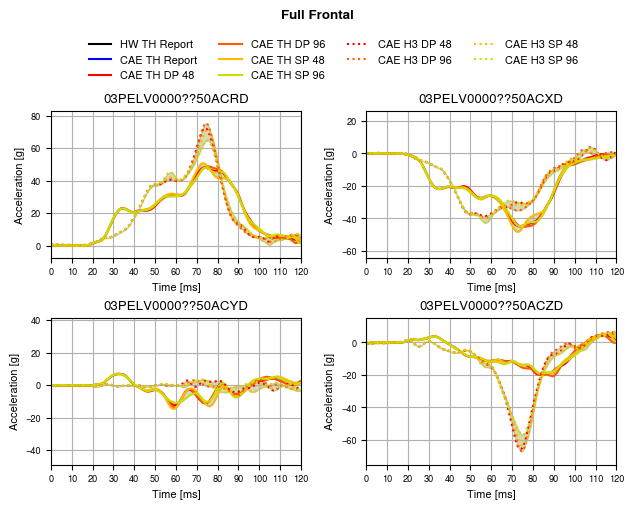

In [10]:
for ss in [1, 3]:
    for case in ["Oblique Right", "Oblique Left", "Full Frontal"]:
        for part in ["HEAD", "CHST", "PELV"]:
            plot_body_acc(ss, case, part)

In [11]:
def plot_femur_fo(side: Literal[1, 3], case: Literal["Oblique Right", "Oblique Left", "Full Frontal"]):
    s = {1: "01", 3: "03"}[side]

    channels = [
        [f"{s}FEMRLE00??50FORD", f"{s}FEMRRI00??50FORD"],
    ]

    plot = ValChainStyledPlot(channels=channels, hw_ration=0.5, nb_path=notebook_path)
    for ch in plot.channels:
        # plot report data
        report = db_report[db_report["Channel"].eq(ch.replace("??", "TH")) & db_report["Case"].eq(case)]
        for i, ass in enumerate(report_ass, 1):
            report2 = report[report["Source"].eq(ass)]
            plot.add_line(channel=ch, x=report2["Time"], y=report2["Value"], label=ass, c_id=-i)

        # plot CAE data
        for i, db_cae in enumerate([db_cae_thor, db_cae_speed]):
            cae = db_cae[db_cae["Channel"].eq(ch.replace("??", plot.dummies[i])) & db_cae["Case"].eq(case)]
            cae.loc[:, "Value"] *= -1 if i == 1 else 1

            # plot single curves
            for j, setting in enumerate(sorted(cae["Assembly"].unique())):
                cae2 = cae[cae["Assembly"].eq(setting)].sort_values("Time")
                plot.add_line(
                    channel=ch, x=cae2["Time"], y=cae2["Value"], label=f"CAE {plot.dummies[i]} {setting}", c_id=j, ls_id=i
                )

            # min max corridor
            plot.add_range(channel=ch, cae=cae, fill_c_id=i)

    plot.format_store(region="FEMR_force", case=case, side=side)

2024-01-23 12:06:00,843 MainProcess  - MainThread      INFO  Store plots in reports\figures\validity_chain\056_Eval_ValChain_THOR_HIII_Speed with file extention(s) ['png', 'pdf'] || ValChainStyledPlot.py
2024-01-23 12:06:00,847 MainProcess  - MainThread      DEBUG Installed font ['TeX Gyre Adventor', 'TeX Gyre Bonum', 'TeX Gyre Chorus', 'TeX Gyre Cursor', 'TeX Gyre Heros', 'TeX Gyre Heros Cn', 'TeX Gyre Pagella', 'TeX Gyre Schola', 'TeX Gyre Termes'] || ValChainStyledPlot.py
2024-01-23 12:06:00,932 MainProcess  - MainThread      DEBUG Add 01FEMRLE00??50FORD line HW TH Report || ValChainStyledPlot.py
2024-01-23 12:06:00,938 MainProcess  - MainThread      DEBUG Add 01FEMRLE00??50FORD line CAE TH Report || ValChainStyledPlot.py
2024-01-23 12:06:01,700 MainProcess  - MainThread      DEBUG Add 01FEMRLE00??50FORD line CAE TH DP 48 || ValChainStyledPlot.py
2024-01-23 12:06:01,707 MainProcess  - MainThread      DEBUG Add 01FEMRLE00??50FORD line CAE TH DP 96 || ValChainStyledPlot.py
2024-01-23 

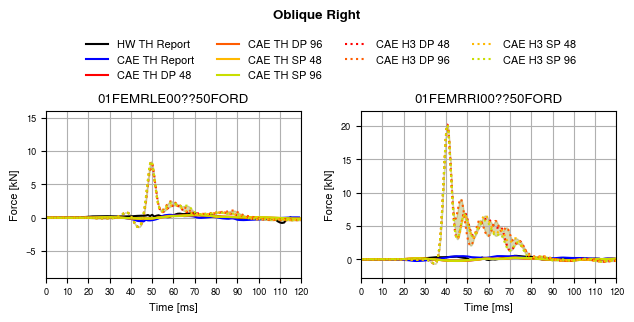

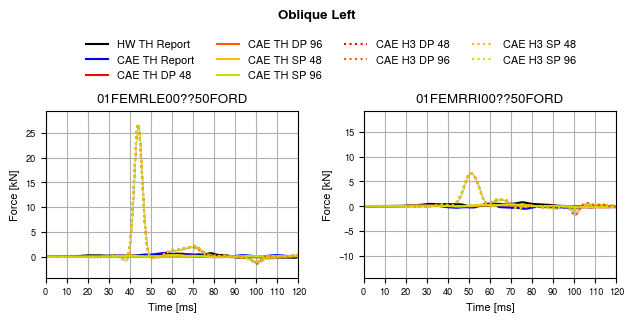

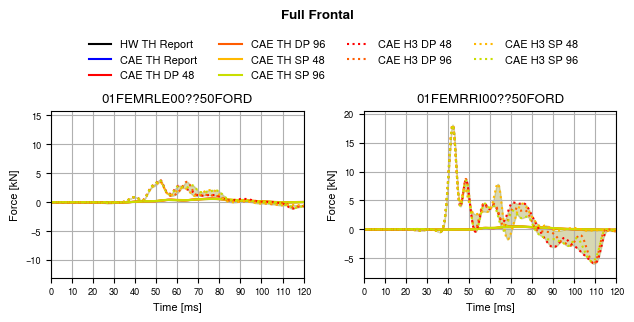

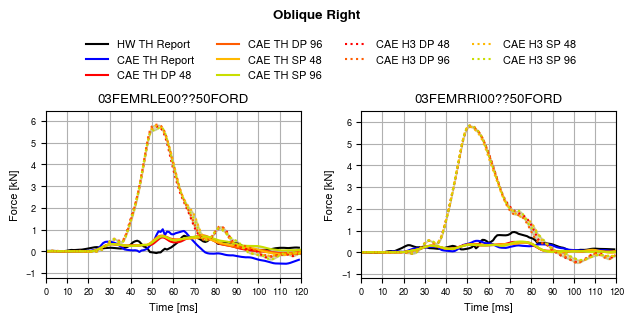

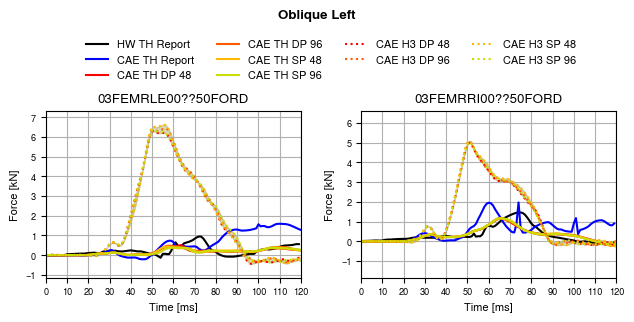

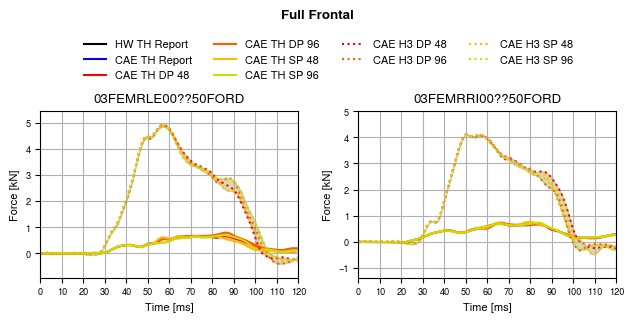

In [12]:
for ss in [1,3]:
    for case in ["Oblique Right", "Oblique Left", "Full Frontal"]:
        plot_femur_fo(ss, case)

In [5]:
def plot_local_dsp(side: Literal[1, 3], case: Literal["Oblique Right", "Oblique Left", "Full Frontal"]):
    s = {1: "01", 3: "03"}[side]

    channels = [
        [f"{s}HEADLOCXZDS?D", f"{s}HEADLOCXYDS?D"],
        [f"{s}CHSTLOCXZDS?D", f"{s}CHSTLOCXYDS?D"],
        [f"{s}PELVLOCXZDS?D", f"{s}PELVLOCXYDS?D"],
    ]

    x_displ_range, y_displ_range, z_displ_range = [[0,0]]*3

    plot = ValChainStyledPlot(channels=channels, hw_ration=1, nb_path=notebook_path, override_format=False)
    for ch in plot.channels:
        # plot CAE data
        for i, db_cae in enumerate([db_cae_thor, db_cae_speed]):
            cae_1 = db_cae[db_cae["Channel"].eq(f"{ch[:6]}LOC0{plot.dummies[i]}50DS{ch[-6]}D") & db_cae["Case"].eq(case)]
            cae_2 = db_cae[db_cae["Channel"].eq(f"{ch[:6]}LOC0{plot.dummies[i]}50DS{ch[-5]}D") & db_cae["Case"].eq(case)]

            # plot single curves
            for j, setting in enumerate(sorted(cae_1["Assembly"].unique())):
                # data
                cae2_1 = cae_1[cae_1["Assembly"].eq(setting)].sort_values("Time")
                cae2_2 = cae_2[cae_2["Assembly"].eq(setting)].sort_values("Time")

                plot.add_line(
                    channel=ch, x=cae2_1["Value"], y=cae2_2["Value"], label=f"CAE {plot.dummies[i]} {setting}", c_id=j, ls_id=i
                )
                x_displ_range = [min(cae2_1["Value"].min(), x_displ_range[0]), max(cae2_1["Value"].max(), x_displ_range[1])]
                if ch[-5] == "Y":
                    y_displ_range = [min(cae2_2["Value"].min(), y_displ_range[0]), max(cae2_2["Value"].max(), y_displ_range[1])]
                else:
                    z_displ_range = [min(cae2_2["Value"].min(), z_displ_range[0]), max(cae2_2["Value"].max(), z_displ_range[1])]
        
        plot.axs[ch].set_xlabel(f"{ch[-6]} Displacement [mm]")
        plot.axs[ch].set_ylabel(f"{ch[-5]} Displacement [mm]")
        plot.axs[ch].set_title(ch)
        plot.axs[ch].scatter([0],[0], c="black")
        plot.axs[ch].grid()
        plot.axs[ch].set_axisbelow(True)

    x_displ_range[0], y_displ_range[0], z_displ_range[0] = [x-0.1*abs(x) for x in (x_displ_range[0], y_displ_range[0], z_displ_range[0])]
    x_displ_range[1], y_displ_range[1], z_displ_range[1] = [x+0.1*abs(x) for x in (x_displ_range[1], y_displ_range[1], z_displ_range[1])]
    for ch in plot.channels:
        plot.axs[ch].set_xlim(x_displ_range)
        if ch[-5] == "Y":
            plot.axs[ch].set_ylim(y_displ_range)
        else:
            plot.axs[ch].set_ylim(z_displ_range)

    plot.fig.suptitle(case)
    plot.axs["none"].legend(*plot.axs[plot.channels[-1]].get_legend_handles_labels(), loc="upper center", ncol=4)
    plot.format_store(region="BODY_disp", case=case, side=side)

2024-01-31 10:32:31,979 MainProcess  - MainThread      DEBUG Installed font ['TeX Gyre Adventor', 'TeX Gyre Bonum', 'TeX Gyre Chorus', 'TeX Gyre Cursor', 'TeX Gyre Heros', 'TeX Gyre Heros Cn', 'TeX Gyre Pagella', 'TeX Gyre Schola', 'TeX Gyre Termes'] || set_rcparams.py
2024-01-31 10:32:31,988 MainProcess  - MainThread      DEBUG Using style src\visualization\dissertation.mplstyle || set_rcparams.py
2024-01-31 10:32:31,992 MainProcess  - MainThread      INFO  Store plots in reports\figures\validity_chain\056_Eval_ValChain_THOR_HIII_Speed with file extention(s) ['png', 'pdf'] || ValChainStyledPlot.py
2024-01-31 10:32:33,395 MainProcess  - MainThread      DEBUG Add 01HEADLOCXZDS?D line CAE TH DP 48 || ValChainStyledPlot.py
2024-01-31 10:32:33,403 MainProcess  - MainThread      DEBUG Add 01HEADLOCXZDS?D line CAE TH DP 96 || ValChainStyledPlot.py
2024-01-31 10:32:33,409 MainProcess  - MainThread      DEBUG Add 01HEADLOCXZDS?D line CAE TH SP 48 || ValChainStyledPlot.py
2024-01-31 10:32:33,41

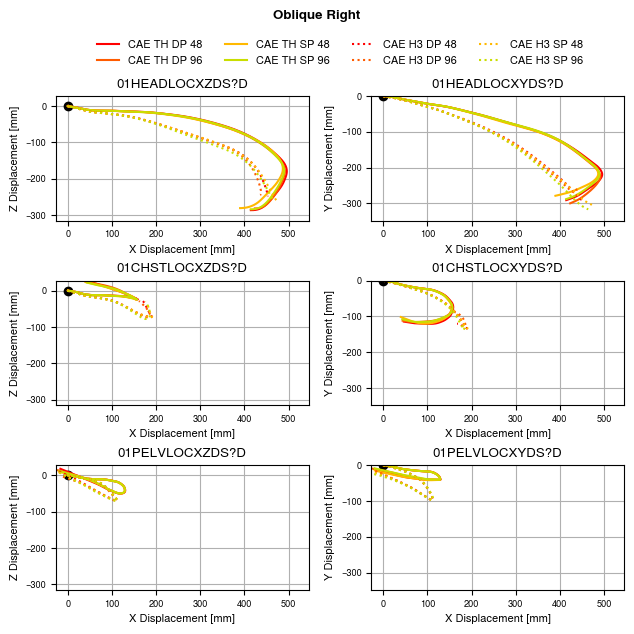

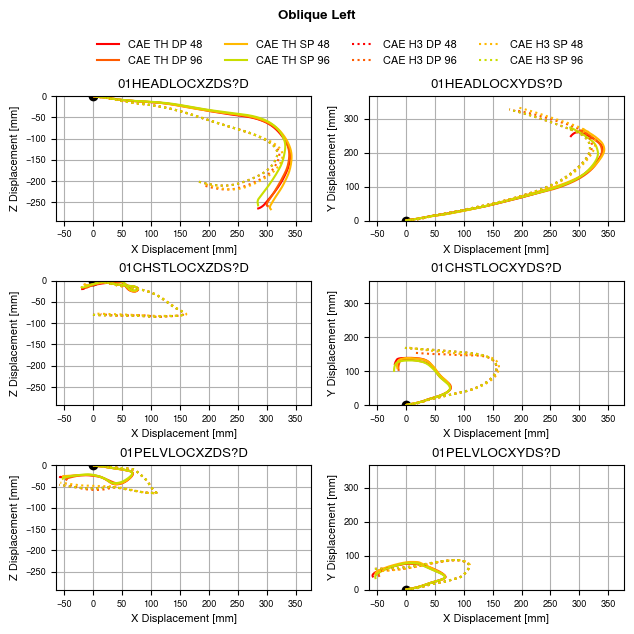

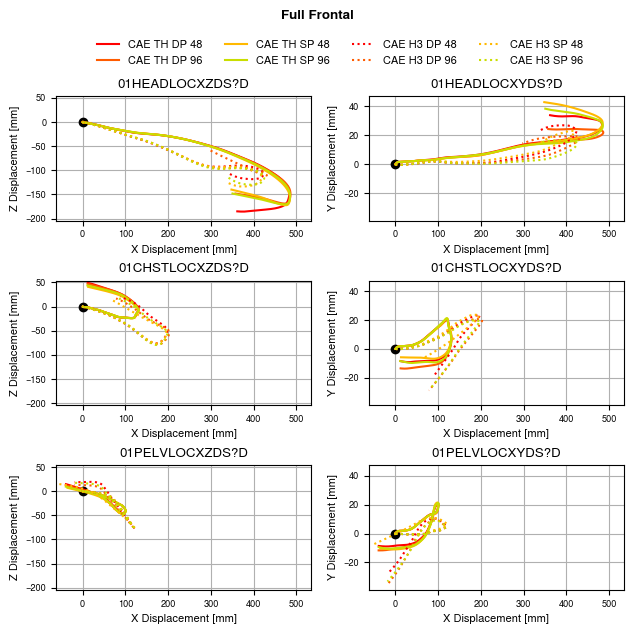

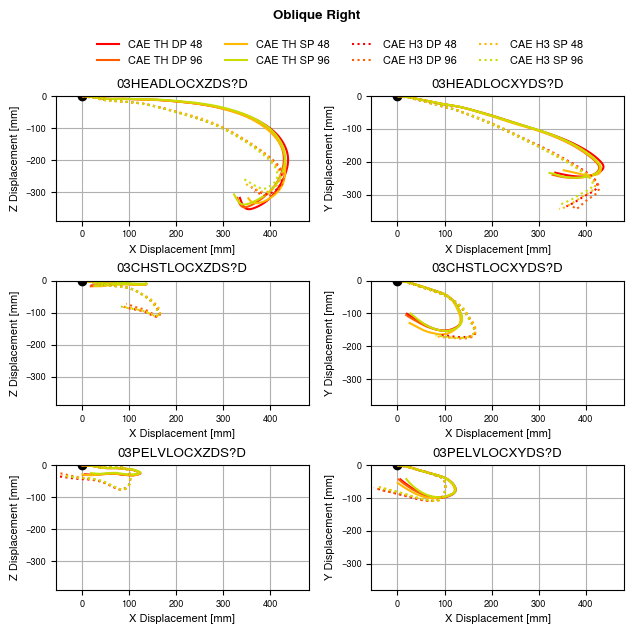

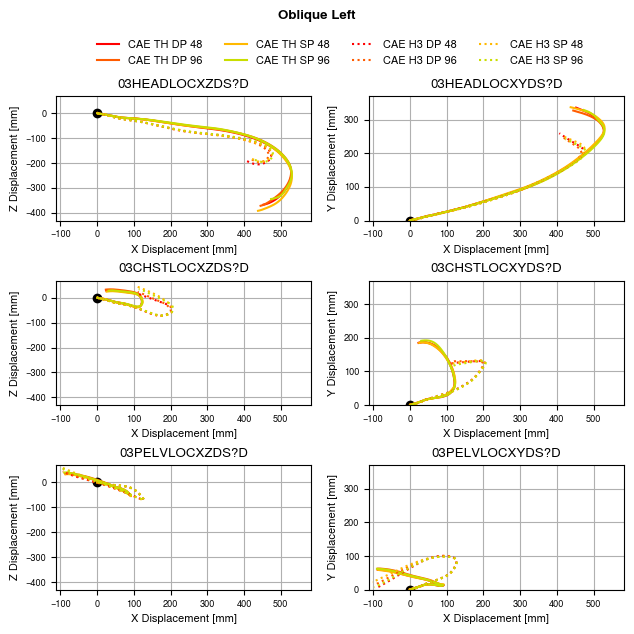

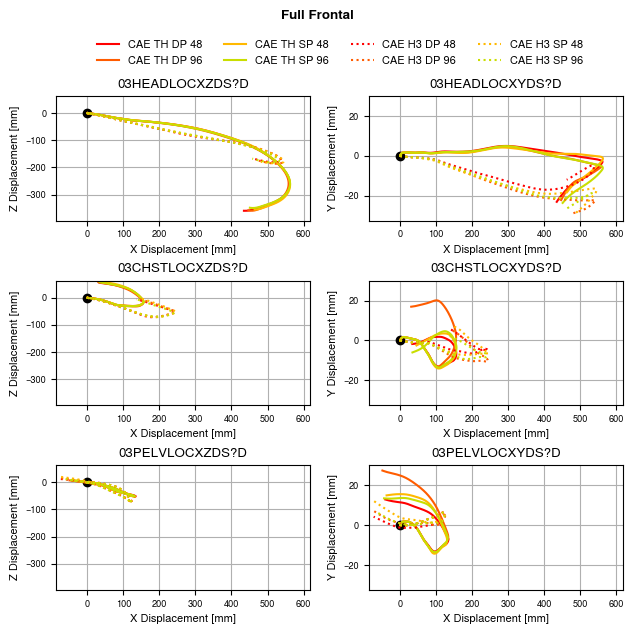

In [6]:
for ss in [1,3]:
    for case in ["Oblique Right", "Oblique Left", "Full Frontal"]:
        plot_local_dsp(ss, case)